In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [294]:
data = pd.read_csv("exchange-rate-twi.csv")

In [295]:
data.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [296]:
data.set_index('Month', inplace=True)

In [297]:
data.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [298]:
data.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


### Checking for the null values

In [299]:
data.isnull().sum()

Exchange Rate TWI    0
dtype: int64

### Shape of the data

In [300]:
data.shape

(305, 1)

### Plotting the data

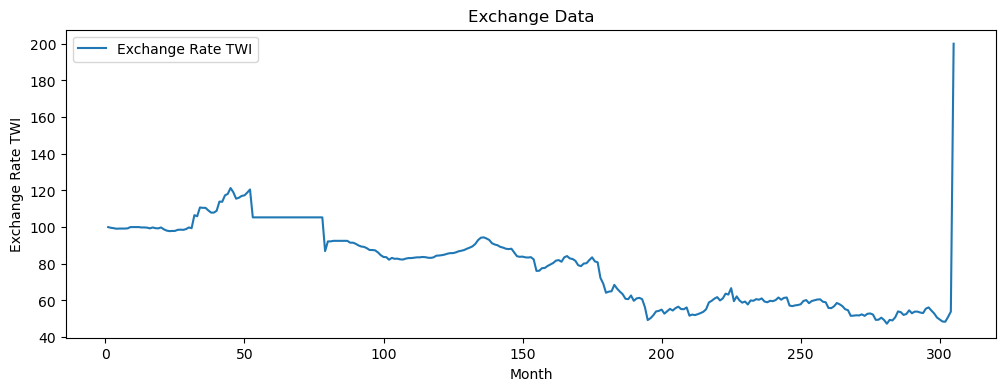

In [301]:
data.plot(figsize= (12,4))
plt.legend(loc='best')
plt.title('Exchange Data')
plt.xlabel('Month')
plt.ylabel('Exchange Rate TWI')

#Display the plot
plt.show(block=False)

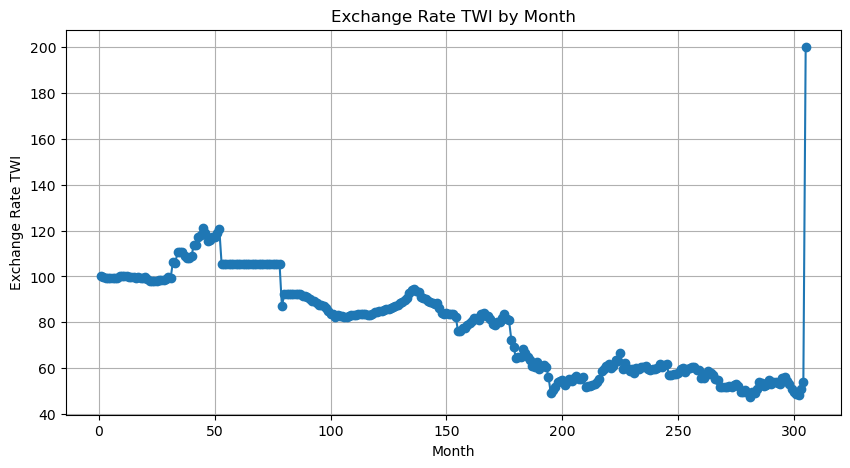

In [302]:
# Plot the data
plt.figure(figsize=(10, 5))  # Optional: You can define the size of the figure
plt.plot(data.index, data['Exchange Rate TWI'], marker='o')  # Plot with markers
# Add title and labels to the plot
plt.title('Exchange Rate TWI by Month')
plt.xlabel('Month')
plt.ylabel('Exchange Rate TWI')
# Show the plot
plt.grid(True)  # Optional: Adds a grid to the plot
plt.show()

### Outlier Detection

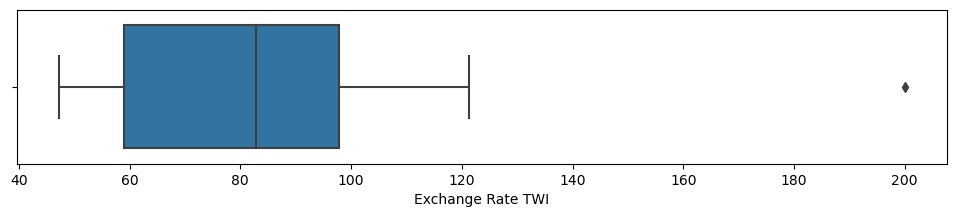

In [303]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Exchange Rate TWI'], whis=1.5)

In [304]:
# Calculate the first quartile (Q1)
Q1 = data['Exchange Rate TWI'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = data['Exchange Rate TWI'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the IQR
print(f"The interquartile range (IQR) is: {IQR}")

The interquartile range (IQR) is: 39.00000000000001


In [305]:
Outlier1 = Q3 + IQR*1.5
print(f"Outlier1  is: {Outlier1}")

Outlier1  is: 156.40000000000003


In [306]:
# However, the right whisker does not extend past the maximum data point
# So, we need to determine the maximum value within the right whisker's range
right_whisker_endpoint = data['Exchange Rate TWI'][data['Exchange Rate TWI'] <= Outlier1].max()

# Print the right whisker endpoint
print(f"The right whisker extends to: {right_whisker_endpoint}")

The right whisker extends to: 121.3


In [307]:
Outlier2 = Q1 - IQR*1.5
print(f"Outlier2  is: {Outlier2}")

Outlier2  is: 0.39999999999998437


In [308]:
# However, the right whisker does not extend past the maximum data point
# So, we need to determine the maximum value within the right whisker's range
left_whisker_endpoint = data['Exchange Rate TWI'][data['Exchange Rate TWI'] <= Outlier2].max()

# Print the right whisker endpoint
print(f"The left whisker extends to: {left_whisker_endpoint}")

The left whisker extends to: nan


In [309]:
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [310]:
# Filter out outliers
data = data[(data['Exchange Rate TWI'] >= lower_bound) & (data['Exchange Rate TWI'] <= upper_bound)]

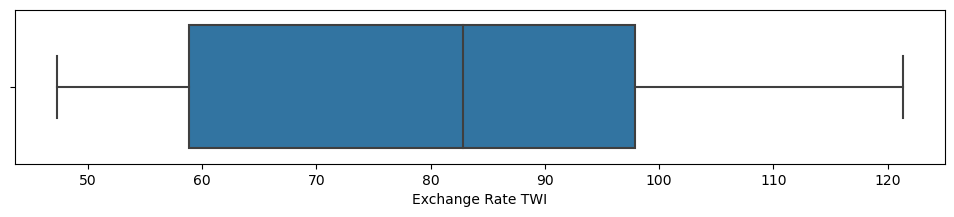

In [311]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Exchange Rate TWI'], whis=1.5)

### Histogram Plot

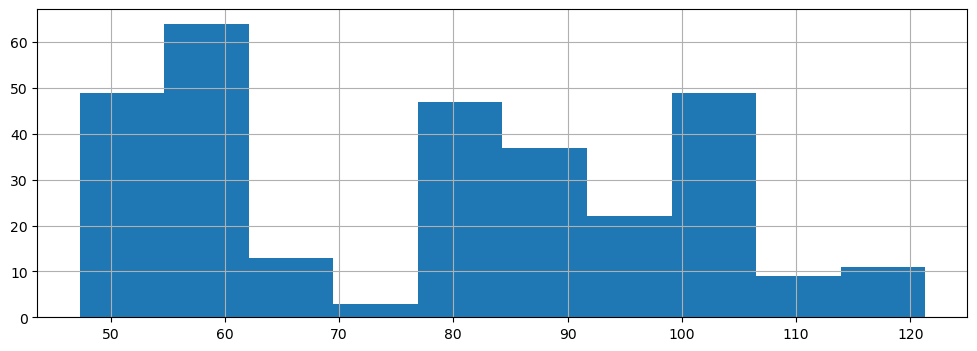

In [312]:
fig = data['Exchange Rate TWI'].hist(figsize=(12,4))

## BUILD AND EVALUATE TIME SERIES FORECAST

### Splitting the time series into Training and Test Set


In [313]:
train_len =212
train = data[0:train_len] # First 120 lines
test = data[train_len:] 

### Naive Method

In [314]:
y_hat_naive['naive_forecast'] = train['Exchange Rate TWI'][train_len]
naive_forecast=y_hat_naive['naive_forecast']

In [315]:
print(train['Exchange Rate TWI'][train_len])

52.0


In [316]:
naive_forecast

Month
213    52.0
214    52.0
215    52.0
216    52.0
217    52.0
       ... 
300    52.0
301    52.0
302    52.0
303    52.0
304    52.0
Name: naive_forecast, Length: 92, dtype: float64

### Simple Average Method

In [317]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Exchange Rate TWI'].mean()

In [318]:
print(train['Exchange Rate TWI'].mean())

88.3254716981132


### Plot Train , Test and Forecast

In [319]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Exchange Rate TWI'][train_len -1]

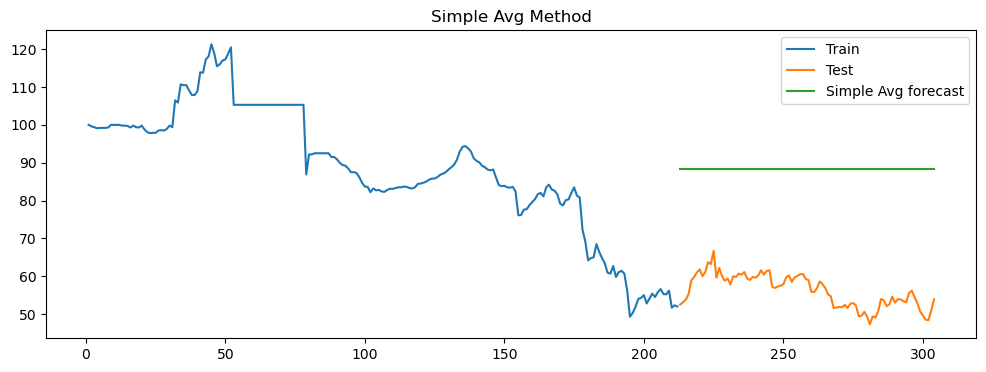

In [320]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label = 'Train')
plt.plot(test['Exchange Rate TWI'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Avg forecast')
plt.legend(loc='best')
plt.title("Simple Avg Method")
plt.show()


### Calculate the RMSE and MAPE to evaluate forecast

In [321]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['naive_forecast'])/test['Exchange Rate TWI'])*100,2)
results = pd.DataFrame({'Method' :['Naive method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,5.78,8.11


### plot , test and forecast


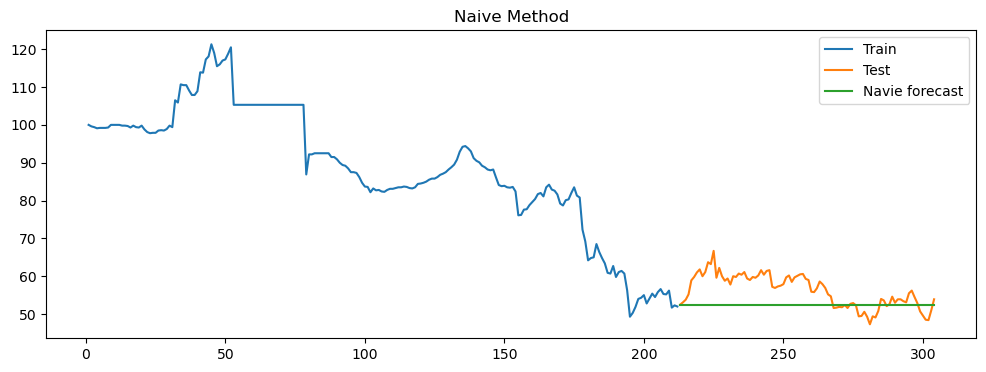

In [322]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label = 'Train')
plt.plot(test['Exchange Rate TWI'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label='Navie forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Simple Average Method

In [323]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Exchange Rate TWI'].mean()

### Plot Train , Test and Forecast

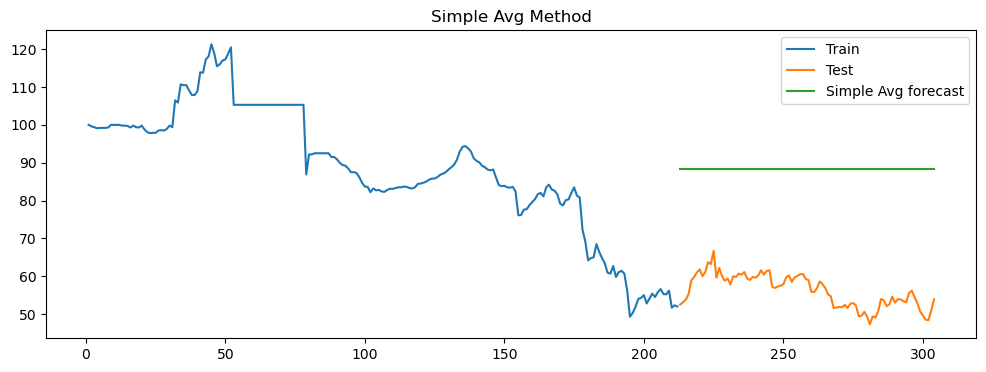

In [324]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label = 'Train')
plt.plot(test['Exchange Rate TWI'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Avg forecast')
plt.legend(loc='best')
plt.title("Simple Avg Method")
plt.show()

### Calculate the RMSE and MAPE to evaluate forecast

In [325]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['naive_forecast'])/test['Exchange Rate TWI'])*100,2)
results = pd.DataFrame({'Method' :['Naive method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,5.78,8.11


### Calculate RMSE and MAPE to evaluate forecast

In [326]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_avg['avg_forecast'])/test['Exchange Rate TWI'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple avg method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,5.78,8.11
0,Simple avg method,32.42,58.12


### Create Calculate Accuracy Metrics

### Mean Absolute error (MAE) - Calculates the average of the squared differences between the forecasted and actual values.



In [327]:
##test - The forecast for each point in the test data is the last observed value from the tranining data.

naive_forecast_values = np.full(shape = len(test), fill_value= naive_forecast)

In [329]:
### Calculating MAE, MSE and RMSE
### MAE
mae= mean_absolute_error(test,naive_forecast_values)
### MSE
mse = mean_squared_error(test,naive_forecast_values)

###RMSE
rmse = np.sqrt(mse)

In [331]:
print('MAE ', mae )
print('MSE ', mse )
print('RMSE ',rmse)



MAE  4.925
MSE  35.805326086956526
RMSE  5.983755182739057


In [338]:
train_naive_data = data['Exchange Rate TWI'][:212]
test_naive_data = data['Exchange Rate TWI'][212:]
naive_forecast_data = train_naive_data.iloc[-1]

In [339]:
naive_forecast_values_data = np.full(shape=len(test_naive_data), fill_value=naive_forecast_data)

In [340]:
## Caculate MAPE
mape = np.mean(np.abs((test_naive_data - naive_forecast_values) / test_naive_data)) * 100

In [344]:
### Calculate the accuracy
accuracy = (1 - (mape / 100))*100

In [345]:
print('MAPE', mape)
print('Accuracy', accuracy)

MAPE 8.406052283180601
Accuracy 91.5939477168194


### Simple Moving Average

In [350]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot Train, Test and Forecast

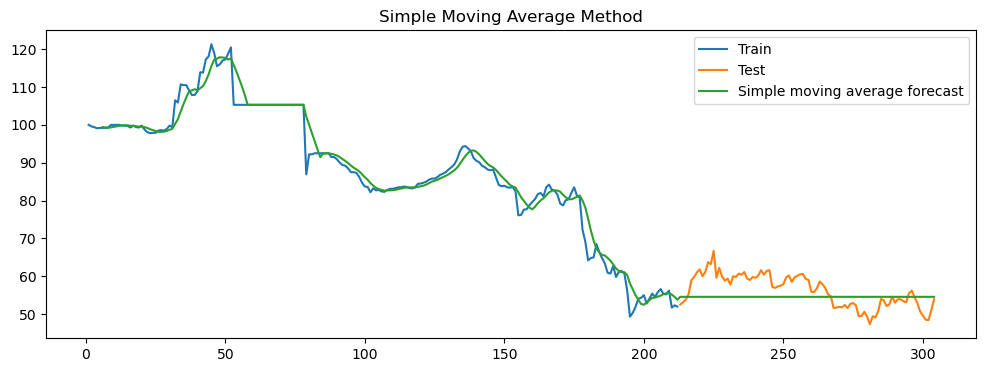

In [351]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label = 'Train')
plt.plot(test['Exchange Rate TWI'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label = 'Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE to evaluate forecast

In [352]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecast'][train_len:])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,5.78,8.11
0,Simple avg method,32.42,58.12
0,Simple Moving Average Method,4.57,6.89
0,Simple Moving Average Method,4.58,6.90
